## Importing Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import pyplot
import matplotlib.cm as cm
import math

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score


from ipywidgets import interact
import ipywidgets as widgets

import warnings
warnings.simplefilter(action='ignore')

## Loading the Data

In [2]:
df=pd.read_csv('DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',delimiter=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## Data Overview

In [3]:
df.shape

(740, 21)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [6]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [10]:
# Separating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:            
        if df[column].nunique() < 15:      
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         

from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical           continuous
--------------------  -------------------------------
Month of absence      ID
Day of the week       Reason for absence
Seasons               Transportation expense
Hit target            Distance from Residence to Work
Disciplinary failure  Service time
Education             Age
Son                   Work load Average/day
Social drinker        Weight
Social smoker         Body mass index
Pet                   Absenteeism time in hours
Height


## Performing EDA

### Univariate Analysis

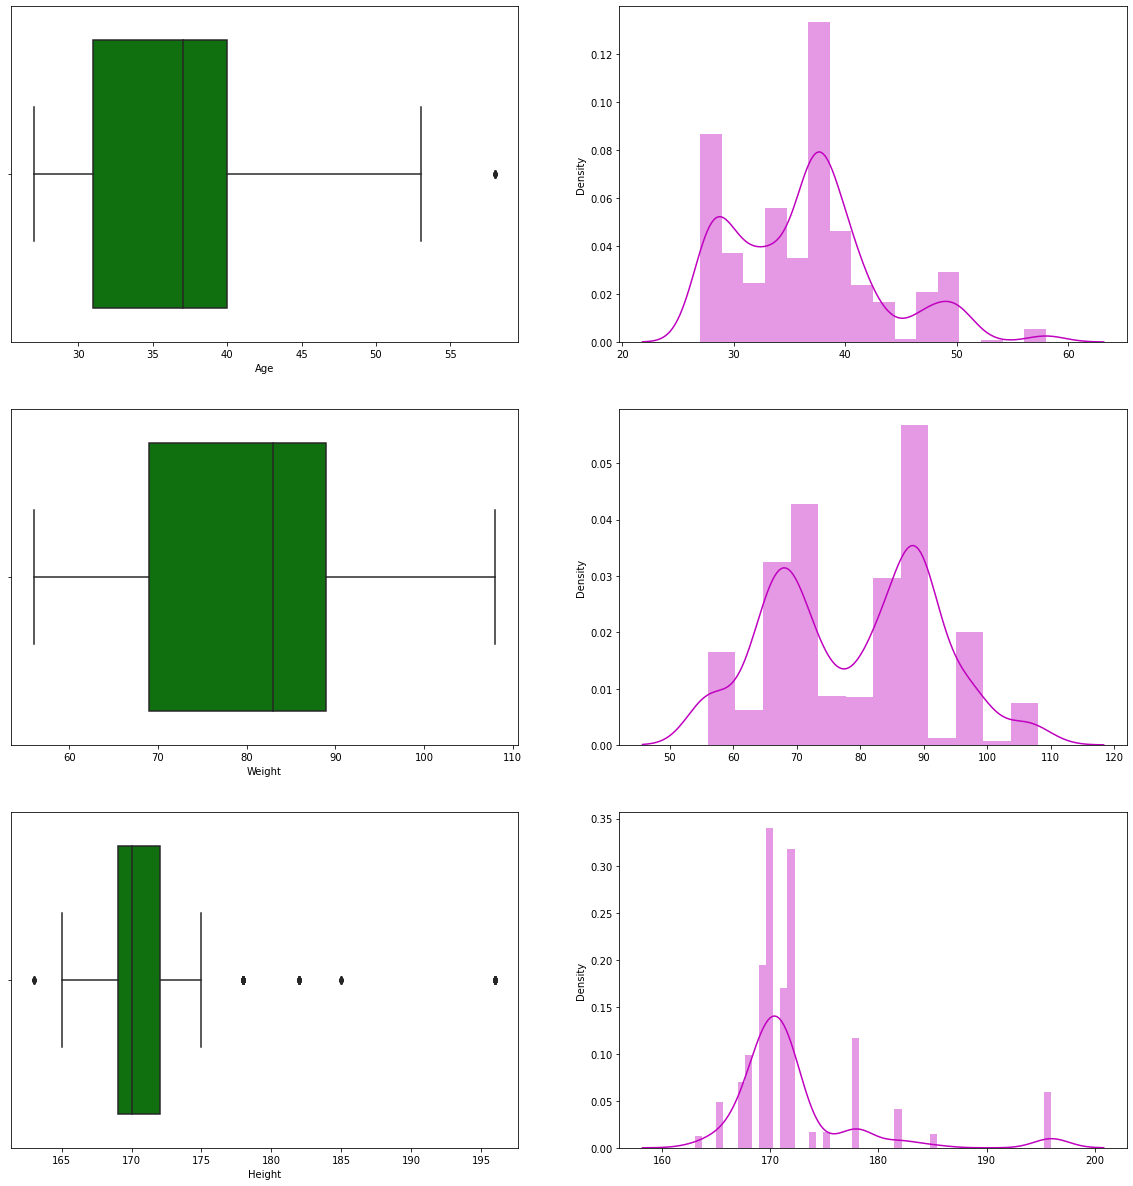

In [11]:
fig, ax = plt.subplots(3, 2, figsize= (20, 21))            
sns.distplot(x = df["Age"], ax =ax[0,1], color = "m")
sns.boxplot(x = df["Age"], ax = ax[0,0], color = "g")
sns.distplot(x = df["Weight"], ax =ax[1,1], color = "m")
sns.boxplot(x = df["Weight"], ax = ax[1,0], color = "g")
sns.distplot(x = df["Height"], ax =ax[2,1], color = "m")
sns.boxplot(x = df["Height"], ax = ax[2,0], color = "g")
plt.show()

### Multivariate Analysis

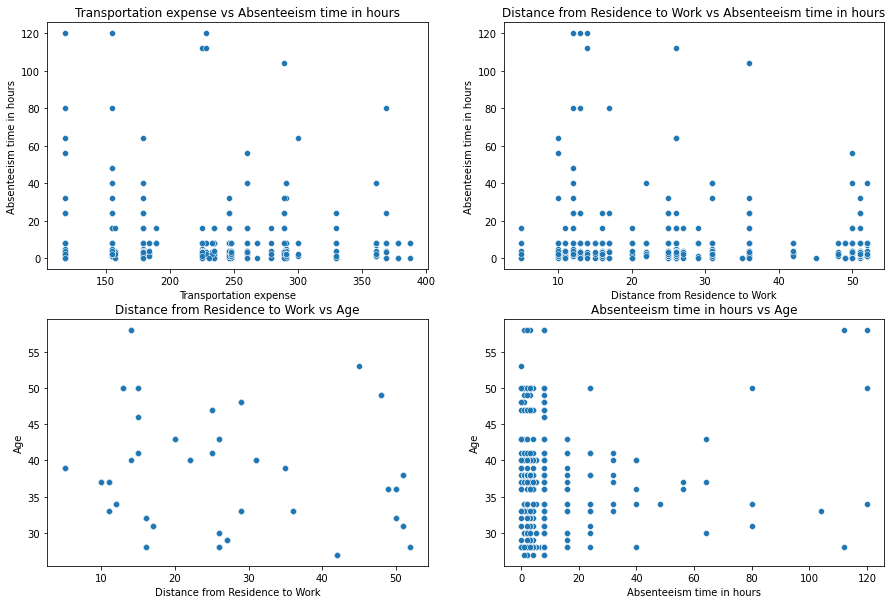

In [14]:
fig, ax=plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(df['Transportation expense'], df['Absenteeism time in hours'], ax=ax[0,0])
ax[0,0].set_title('Transportation expense vs Absenteeism time in hours')
sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', data=df, ax=ax[0,1])
ax[0,1].set_title('Distance from Residence to Work vs Absenteeism time in hours')
sns.scatterplot(x='Distance from Residence to Work', y='Age', data=df, ax=ax[1,0])
ax[1,0].set_title('Distance from Residence to Work vs Age')
sns.scatterplot(x='Absenteeism time in hours', y='Age', data=df, ax=ax[1,1])
ax[1,1].set_title('Absenteeism time in hours vs Age')
plt.show()
plt.close()

In [15]:
cont_var = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

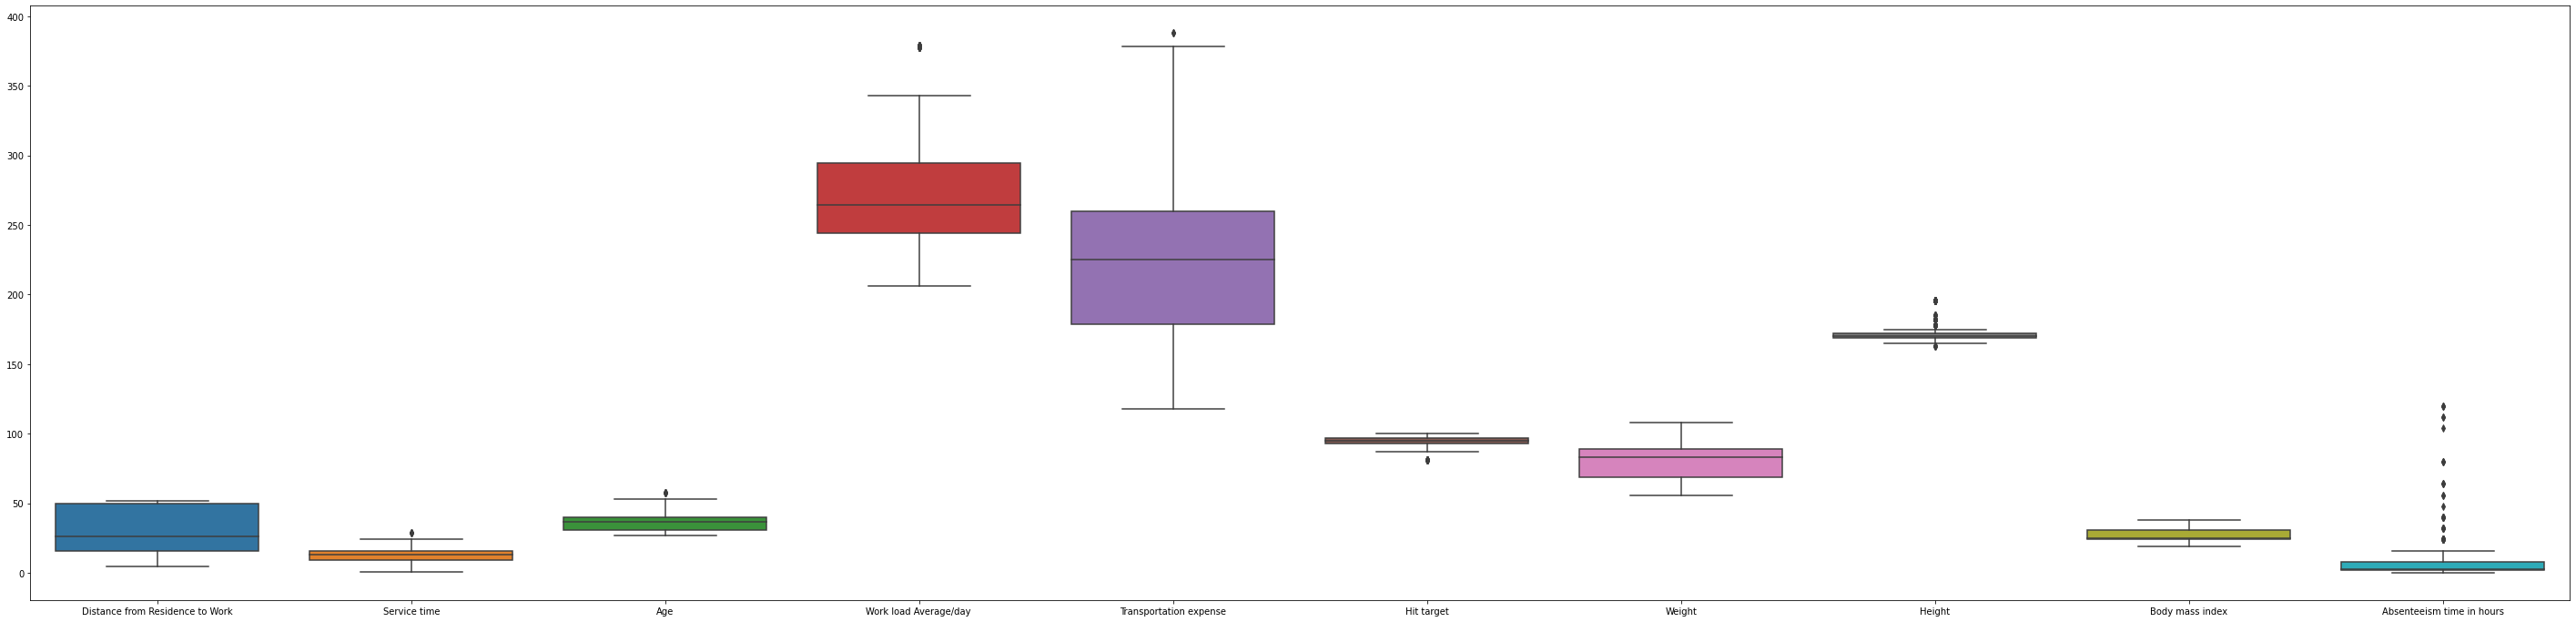

In [17]:
plt.figure(figsize=(50,12))
sns.boxplot(data=df[cont_var])
plt.show()

## Data Preprocessing

In [19]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## Building Models

### K means Clustering

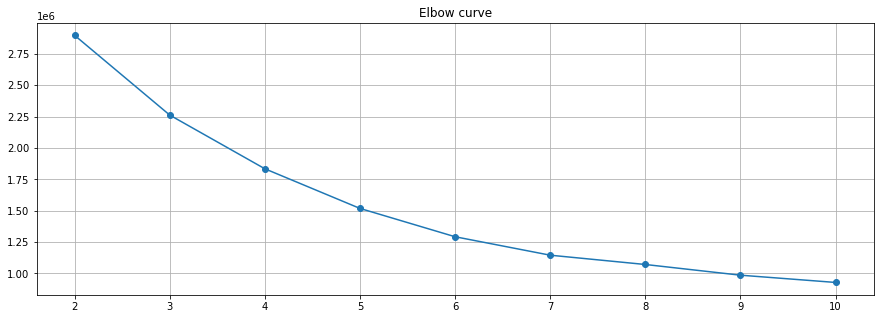

In [22]:
absent= []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k) #x axis
    kmeans.fit(df_num)
    absent.append(kmeans.inertia_) #y axis

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 11), absent,marker='o')
plt.grid(True)
plt.title('Elbow curve');

number of clusters: 3
number of outliers: 0


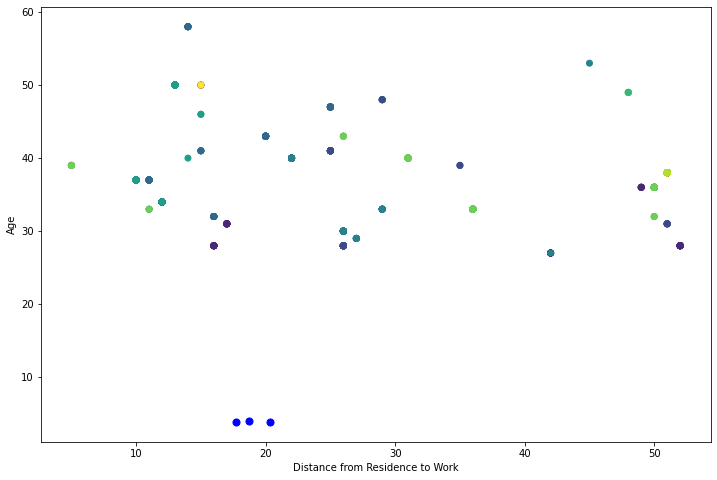

In [26]:
km = KMeans(n_clusters=3).fit(df_num)

df_num['Labels'] = km.labels_
centroids = km.cluster_centers_

labels_scale = km.labels_
n_clusters = labels_scale.max() + 1
n_outliers = np.sum(labels_scale == -1)
print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')

plt.figure(figsize=(12, 8))
plt.scatter(df_num['Distance from Residence to Work'],df_num['Age'], c= kmeans.labels_)
plt.scatter(centroids[:, 1], centroids[:, 3], c='b', s=50)

plt.xlabel('Distance from Residence to Work')
plt.ylabel('Age')
plt.show()

### Agglomerative Clustering

For n_clusters = 3 The average silhouette_score is : 0.3368264165735117
For n_clusters = 4 The average silhouette_score is : 0.2533389691507871
For n_clusters = 5 The average silhouette_score is : 0.24196995595587878
For n_clusters = 6 The average silhouette_score is : 0.21472842449134127


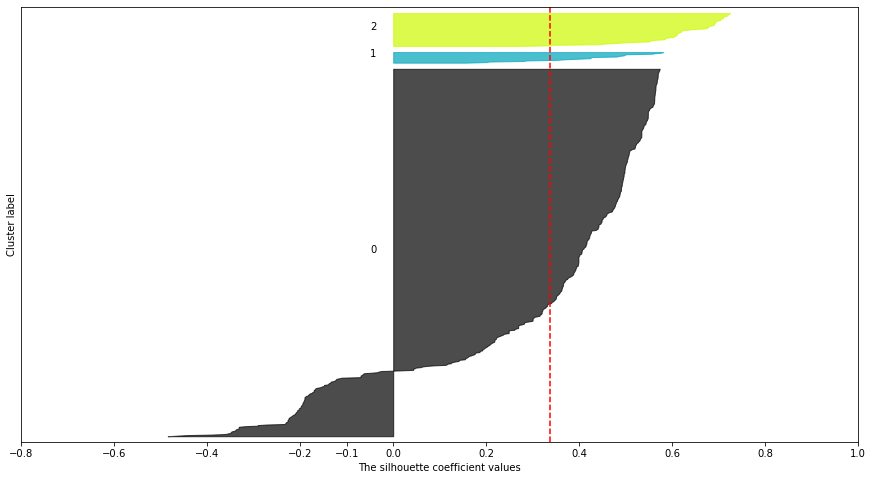

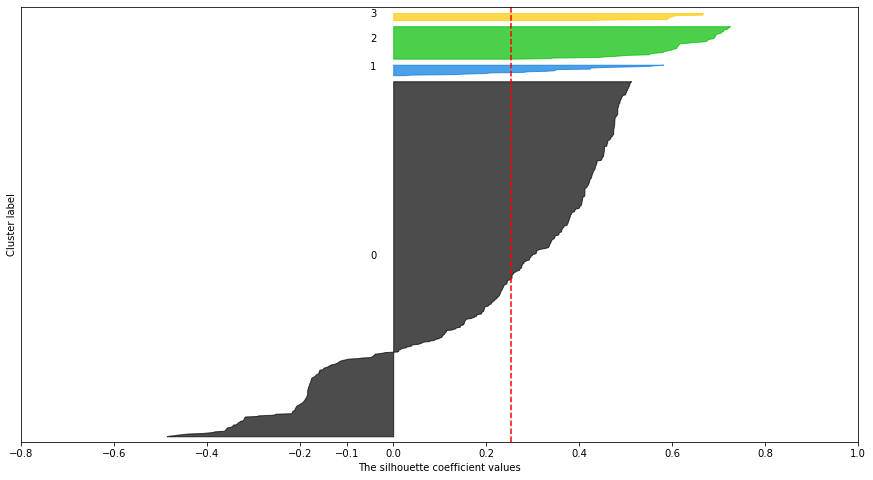

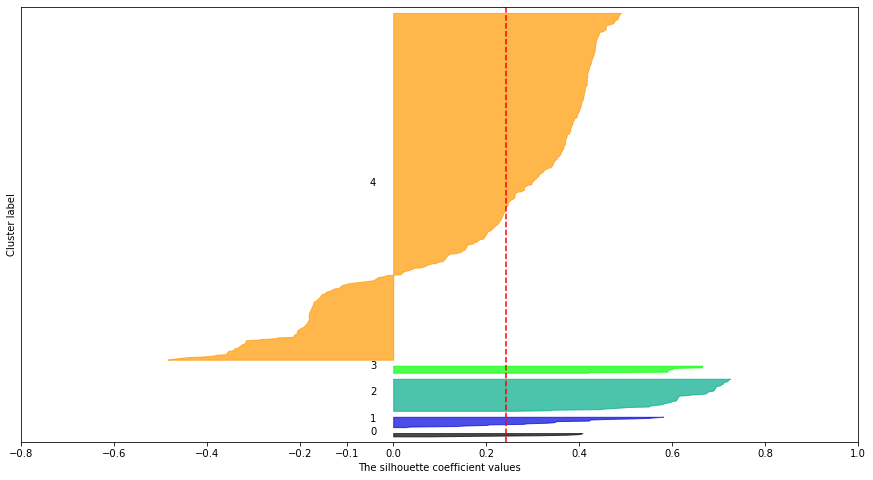

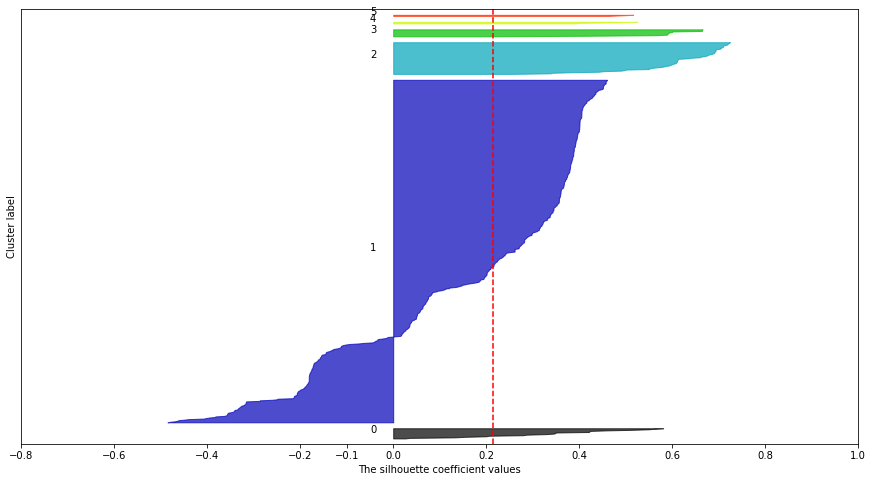

In [28]:
range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1,figsize=(15,8))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_num) + (n_clusters + 1) * 10])

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'average')
    cluster_labels = clusterer.fit_predict(df_num)

    silhouette_avg = silhouette_score(df_num, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_num, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x = silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.8, -0.6, -0.4, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

number of clusters: 5
number of outliers: 0


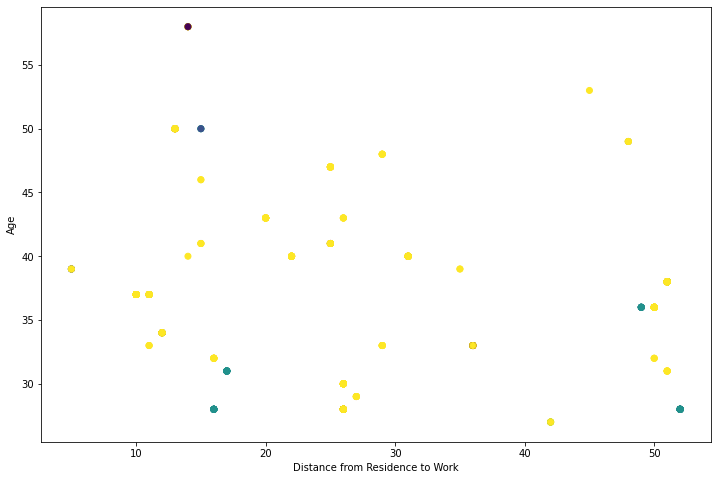

In [30]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df_num)

labels_scale2 = agglo.labels_
n_clusters = labels_scale2.max() + 1
n_outliers = np.sum(labels_scale2 == -1)
print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')

plt.figure(figsize=(12, 8))
plt.scatter(df_num['Distance from Residence to Work'],df_num['Age'], c= labels_scale2)

plt.xlabel('Distance from Residence to Work')
plt.ylabel('Age')
plt.show()

### DBSCAN Clustering

In [31]:
def fit_and_plot_clustering(ab_num, clusterer,x,y, print_number=False):
    ab_num = ab_num.copy()
    ab_num['clusterid'] = clusterer.fit_predict(ab_num[[x, y]])
    n_clusters = ab_num['clusterid'].max() + 1
    n_outliers = np.sum(ab_num['clusterid'] == -1)
    if print_number:
        print(f'number of clusters: {n_clusters}\nnumber of outliers: {n_outliers}')
    cmap = plt.get_cmap('Set1', n_clusters+1)
    ax = ab_num.plot(kind='scatter', x=x, y=y, c='clusterid', cmap=cmap, s=80, colorbar=False)
    ax.grid()
    
    return ab_num
    
style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')

In [33]:
def plot_dbscan(eps = 1.3, min_samples = 21):
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    lable_df = fit_and_plot_clustering(df_num, dbscan, 'Distance from Residence to Work', 'Age', print_number = True)
    
i = interact(plot_dbscan
            , eps = widgets.SelectionSlider(options = np.arange(0.9, 1.3, 0.1), description='Epsilon', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(3, 21), description='Minimum of samples', layout=layout, style=style, disabled=False,continuous_update=False,orientation='horizontal',readout=True)
        );

interactive(children=(SelectionSlider(continuous_update=False, description='Epsilon', layout=Layout(width='400…

## **Conclusion**
- Among the three algorithms used, DBSCAN was able to detect outliers and formed better clusters.

- KMeans and Agglomerative methods coud not detect any outlier.
